In [2]:
# Импортируем модули и библиотеки

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [4]:
# Делим наш датасет на обучающуюи тестовую выборки

In [5]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# Предварительньная обработка данных

In [8]:
# Посмотрим как выглядят изображения

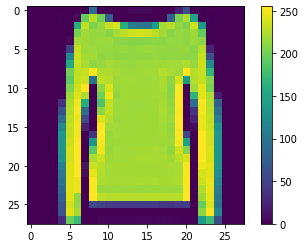

In [9]:
plt.figure()
plt.imshow(X_train[135]) # Обучающая выборка 0-59999 (60000 изобр., а остальные 10000 - тестовая)
plt.colorbar()
plt.grid(False)

In [10]:
X_train = X_train/255
X_test = X_test/255

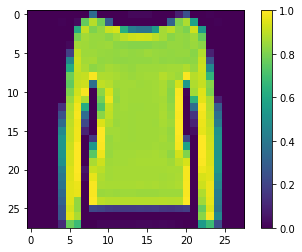

In [11]:
plt.figure()
plt.imshow(X_train[135]) # Обучающая выборка 0-59999 (60000 изобр., а остальные 10000 - тестовая)
plt.colorbar()
plt.grid(False)

In [12]:
# посмотрим несколько изображений

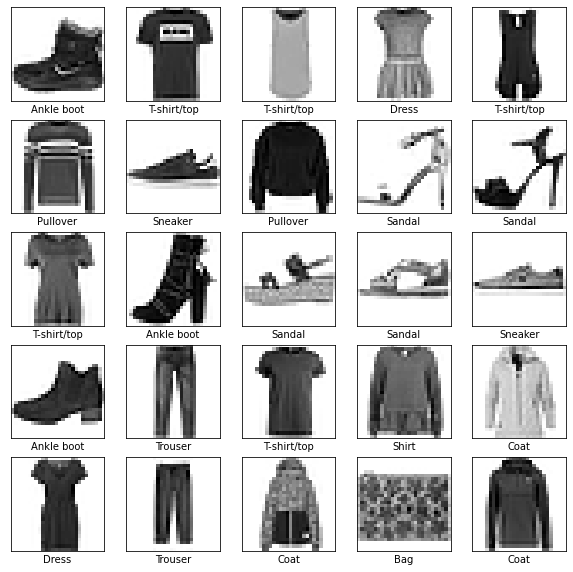

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap=plt.cm.binary) # черное-белое
  plt.xlabel(class_names[Y_train[i]])

In [14]:
# Создание модели нейронной сети

In [15]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [16]:
# Компиляция модели

In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Обучение модели

In [20]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.7422 - accuracy: 0.7631
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5113 - accuracy: 0.8253
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4668 - accuracy: 0.8396
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4420 - accuracy: 0.8473
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4237 - accuracy: 0.8532
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4089 - accuracy: 0.8587
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8613
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3874 - accuracy: 0.8640
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3787 - accuracy: 0.8684
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.37

In [21]:
# Проверка точности предсказания

In [22]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4049 - accuracy: 0.8552
Test accuracy:  0.8551999926567078


In [23]:
# Предсказываем

In [24]:
predictions = model.predict(X_train)

In [25]:
predictions[35]

array([2.3443070e-04, 3.4160104e-05, 1.0550966e-03, 1.1566075e-03,
       1.1121331e-03, 6.5228567e-05, 1.9766306e-04, 6.4145033e-06,
       9.9613577e-01, 2.4854667e-06], dtype=float32)

In [26]:
np.argmax(predictions[35])

8

In [27]:
Y_train[35]

8

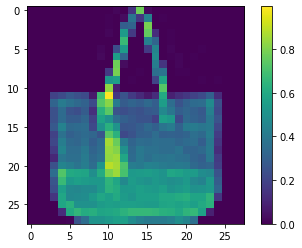

In [28]:
plt.figure()
plt.imshow(X_train[35])
plt.colorbar()
plt.grid(False)

In [29]:
class_names[np.argmax(predictions[35])]

'Bag'